<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Integración numérica Montecarlo</font> </center>




**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

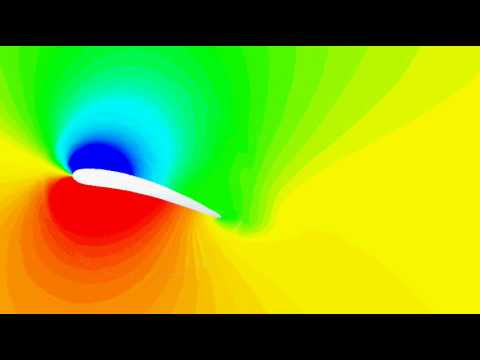

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

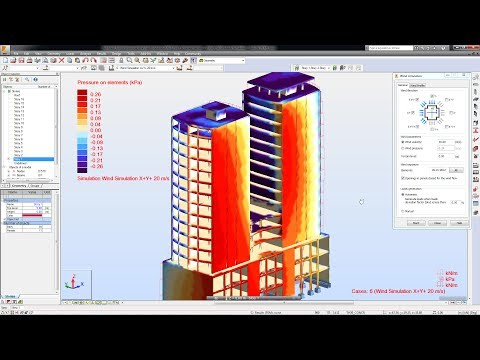

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def f(x):
    return x**2

In [5]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) or scalar, default: 0
        The y coordinates of the nodes defining the second curve.
    
    where : array of bool (length N), optional
        Define *

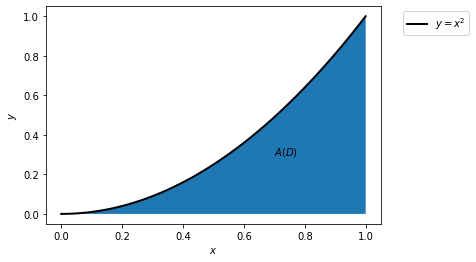

In [6]:
# Dibujamos la región
# Generamos los puntos de la curva y=x^2
x = np.linspace(0,1)
y = f(x) # x**2
plt.plot(x,y,'k',lw=2,label='$y=x^2$')
#Rellenamos la región
plt.fill_between(x,y)
# Texto A(R)
plt.text(0.7,0.3,'$A(D)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))
plt.show()

Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}x^2\text{d}x$$.

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=x^2$ es exactamente el valor promedio de $f(x)=x^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}x^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}u_i^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

**¿Cómo construit vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [7]:
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the ``uniform`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high.  The default value is 1.0.
    size 

In [8]:
# ayuda en la funcion uniform de la libreria numpy.random
np.random.uniform()

0.08859075948785011

In [9]:
u_0 = np.random.uniform(0,1,10)
u_0

array([0.95011774, 0.96799551, 0.09563743, 0.83418268, 0.77982951,
       0.52210187, 0.9022833 , 0.05355675, 0.61178708, 0.17651073])

In [10]:
f(u_0)

array([0.90272372, 0.93701531, 0.00914652, 0.69586075, 0.60813406,
       0.27259036, 0.81411516, 0.00286833, 0.37428343, 0.03115604])

In [11]:
# Número de puntos par aproximar
N=1000000
#secuencia de N números aleatorios con dist uniforme entre 0, 1
u = np.random.uniform(0,1,N)
#Aproximación del área
A_R = (u**2).sum()/N
# A_R = u**2.mean()
# A_R = f(u).mean()
A_R

0.33264532784939277

In [12]:
1/3

0.3333333333333333

En este caso, la integral se puede hacer fácilmente. Comparemos el resultado con el valor real:

$$A(\mathcal{D})=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}$$

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [13]:
# Importamos pandas
import pandas as pd

In [14]:
# Valor exacto del Area 
A_R = 1/3
#Cantidades de términos 10,100,...,10**7 ---> escala logaritmica
n_terminos = np.logspace(1,7,7).astype(int)
#crear un DataFrame cuyo indice sea la cantidad de términos ys sus columnas sean el 
#valor promedio de la integral y el error relativo
tabla = pd.DataFrame(columns=['Approx','Error'], index = n_terminos)
for n in n_terminos:
    u = np.random.uniform(0,1,n)
    tabla.loc[n,'Approx'] = (u**2).mean()
    tabla.loc[n,'Error'] = np.abs(A_R - tabla.loc[n,'Approx'])

In [15]:
tabla

,Approx,Error
10,0.344759,0.011426
100,0.298924,0.034409
1000,0.335219,0.001886
10000,0.33457,0.001237
100000,0.334673,0.00134
1000000,0.333807,0.000473
10000000,0.333371,0.000037


Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i)$$,

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [16]:
# Escribir la función acá
def montecarlo_tipo1(f,a,b,N):
    u = np.random.uniform(a,b,N)
    return ((b-a)/N)*f(u).sum()

In [17]:
f(1)

1

In [18]:
montecarlo_tipo1(f,1,2,1000)

2.3026850535235397

In [19]:
2**3/3 - 1/3

2.333333333333333

In [20]:
# Valor exacto del Area 
A_R = 2**3/3 - 1/3
#Cantidades de términos 10,100,...,10**7 ---> escala logaritmica
n_terminos = np.logspace(1,7,7).astype(int)
#crear un DataFrame cuyo indice sea la cantidad de términos ys sus columnas sean el 
#valor promedio de la integral y el error relativo
a=1
b=2
tabla = pd.DataFrame(columns=['Approx','Error'], index = n_terminos)
for n in n_terminos:
    tabla.loc[n,'Approx'] = montecarlo_tipo1(f,a,b,n)
    tabla.loc[n,'Error'] = np.abs(A_R - tabla.loc[n,'Approx'])
tabla

,Approx,Error
10,2.493306,0.159973
100,2.227879,0.105454
1000,2.337736,0.004402
10000,2.313832,0.019501
100000,2.335596,0.002263
1000000,2.333858,0.000524
10000000,2.333535,0.000202


**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

In [21]:
def f1(x):
    return np.exp(x**2)

In [41]:
def f2(x):
    return 1/np.log(x)


In [42]:
def f3(x):
    return np.sin(x)/x


In [44]:
a=2
b=2.1
terminos = np.logspace(1,7,7).astype(int)

In [47]:
#Aproximación montecarlo tipo 1 de f1
tabla = pd.DataFrame(columns = ['Aprox f1', 'Aprox f2', 'Aprox f3'], index=terminos)
for n in terminos:
    tabla.loc[n,'Aprox f1'] = montecarlo_tipo1(f=f1,
                                              a=a,
                                              b=b,
                                              N=n)
    tabla.loc[n,'Aprox f2'] = montecarlo_tipo1(f=f2,
                                              a=a,
                                              b=b,
                                              N=n)
    tabla.loc[n,'Aprox f3'] = montecarlo_tipo1(f=f3,
                                              a=a,
                                              b=b,
                                              N=n)

In [48]:
tabla

,Aprox f1,Aprox f2,Aprox f3
10,6.824231,0.137995,0.043186
100,6.725452,0.139468,0.043164
1000,6.760331,0.139326,0.043228
10000,6.747689,0.139366,0.043292
100000,6.737895,0.139375,0.043283
1000000,6.738888,0.13938,0.043287
10000000,6.737654,0.139381,0.043286


___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

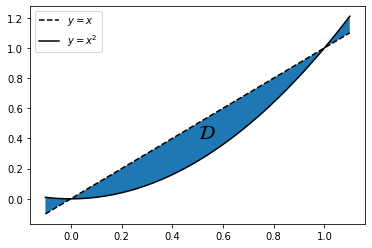

In [53]:
x = np.linspace(-0.1,1.1)
y1= x
y2 = x**2

plt.figure(figsize=(6,4))
plt.plot(x,y1,'k--', label='$y=x$')
plt.plot(x,y2,'k', label='$y=x^2$')
plt.fill_between(x,y1,y2)
plt.text(0.5,0.4,'$\mathcal{D}$', fontsize=20)
plt.legend(loc='best')
plt.show()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

In [55]:
A_D = 1/6
N=10**7

In [56]:
# Usar la funcion montecarlo1
A_D_approx = montecarlo_tipo1(f = lambda x: x - x**2,
                             a=0,
                             b=1,
                             N=N)

In [58]:
A_D, A_D_approx

(0.16666666666666666, 0.1666834719691101)

In [60]:
error = np.abs(A_D - A_D_approx)
error

1.680530244344003e-05

In [61]:
# Función explícita
def nombre_funcion(x):
    return x**2

In [64]:
# Función implícita (anónima)
nombre_funcion2 = lambda x: x**2

In [65]:
nombre_funcion(2), nombre_funcion2(2)

(4, 4)

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

In [67]:
# Parte superior de circunferencia centrada en el origen
# x^2 + y^2 = r^2 ----> y^2 = r^2 - x^2 ----> y = np.sqrt(r^2 -x^2)
#
def circ_arriba(x, R):
    return np.sqrt(R**2 - x**2)
# Parte inferior de circunferencia centrada en el origen
def circ_abajo(x,R):
    return -np.sqrt(R**2 - x**2)

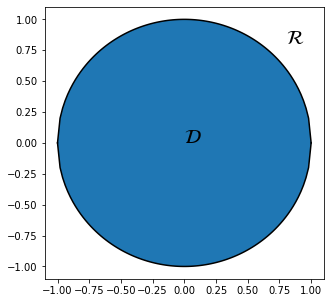

In [71]:
x = np.linspace(-1,1,100)
y1 = circ_arriba(x,1)
y2 = circ_abajo(x,1)

plt.figure(figsize=(5,5))
plt.plot(x,y1,'k')
plt.plot(x,y2,'k')
plt.fill_between(x,y1,y2)
plt.text(0,0,'$\mathcal{D}$', fontsize=20)
plt.text(0.8,0.8,'$\mathcal{R}$', fontsize=20)
plt.show()

Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

In [82]:
# Se generan variables aleatorias para cada dimensión
N =1000
x = np.random.uniform(low=-1, high=1, size=N)
y = np.random.uniform(low=-1, high=1, size=N)


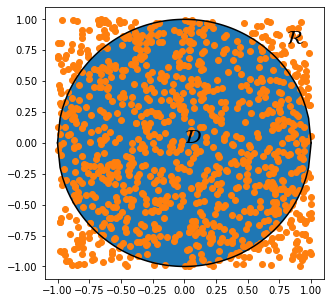

In [83]:
# Gráfica de los disparos aleatorios
plt.figure(figsize=(5,5))
xx = np.linspace(-1,1,100)
plt.plot(xx,y1,'k')
plt.plot(xx,y2,'k')
plt.fill_between(xx,y1,y2)
#Disparos aleatorios N
plt.scatter(x,y)
plt.text(0,0,'$\mathcal{D}$', fontsize=20)
plt.text(0.8,0.8,'$\mathcal{R}$', fontsize=20)
plt.show()



La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de theta se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

In [84]:
# Se generan variables aleatorias para cada dimensión
def circulo(x,y,R):
    return x**2 + y**2 <= R**2

In [89]:
# Función que devuelve True si está dentro del círculo
# y False de lo contrario
circulo(0,0,1), circulo(1,1,1), circulo(0.5,0.5,1)

(True, False, True)

In [93]:
N

1000

In [92]:
# Área del rectángulo
A_R = 4
b = circulo(x,y,1)
#Aproximar la región D
A_D_approx = b.mean()*A_R
A_D_approx

3.084

De nuevo, comparemos con el valor exacto.

In [94]:
# Valor exacto del area AD
A_D = np.pi
# cantidad de términos 10,100,..,10**7
n_terminos = np.logspace(1,7,7).astype(int)

tabla = pd.DataFrame(index=n_terminos, columns =['approx','error'])
for n in n_terminos:
    x = np.random.uniform(-1,1,n)
    y = np.random.uniform(-1,1,n)
    b = circulo(x,y,1)
    A_D_approx = b.mean()*A_R
    tabla.loc[n,'approx'] = A_D_approx
    tabla.loc[n, 'error'] = np.abs(A_D - A_D_approx)

In [95]:
tabla

,approx,error
10,3.2,0.058407
100,3.16,0.018407
1000,3.136,0.005593
10000,3.1172,0.024393
100000,3.14468,0.003087
1000000,3.142176,0.000583
10000000,3.141818,0.000226


Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [96]:
# Escribir la función acá
def montecarlo2(f,a1,b1,a2,b2,N):
    x = np.random.uniform(a1,b1,N)
    y = np.random.uniform(a2,b2,N)
    b = f(x,y)
    A_R = (b1-a1)*(b2-a2)
    return b.mean()*A_R

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

In [97]:
def region(x,y):
    return 4*(2*x - 1)**4 + 8*(2*y-1)**8 < 1 + 2*(2*y -1)**3*(3*x -2)**2

In [102]:
region(0.4,0.3)

True

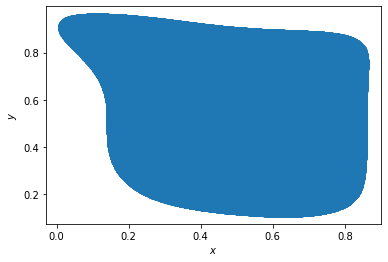

In [103]:
# Dibujemos la región
N = 1000000
x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)
dentro_region = region(x,y)
plt.scatter(x[dentro_region],y[dentro_region])
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

In [40]:
# Resolver
